<a href="https://colab.research.google.com/github/Playcrusher/Algo-project-2/blob/main/Fuzzy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 14.7 MB/s eta 0:00:00


Nilai Tipping 19.847607361963192


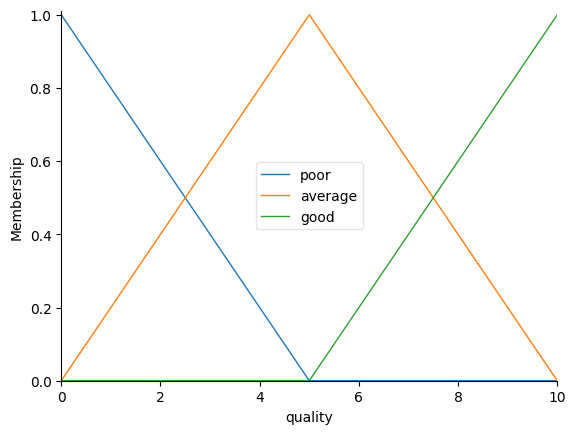

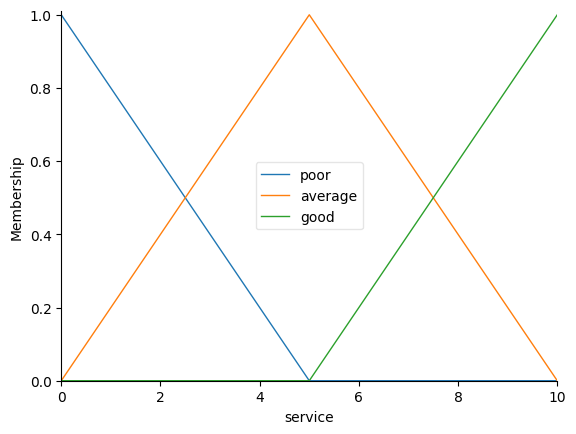

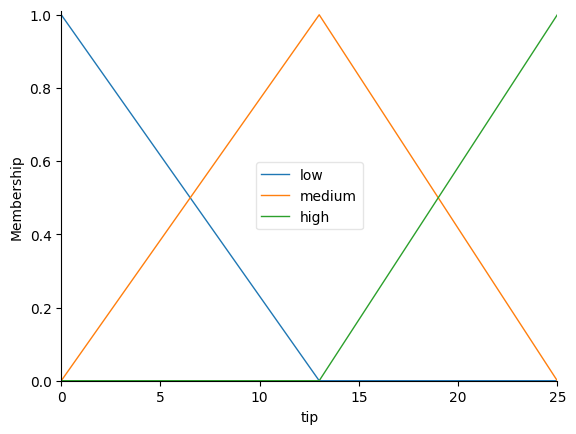

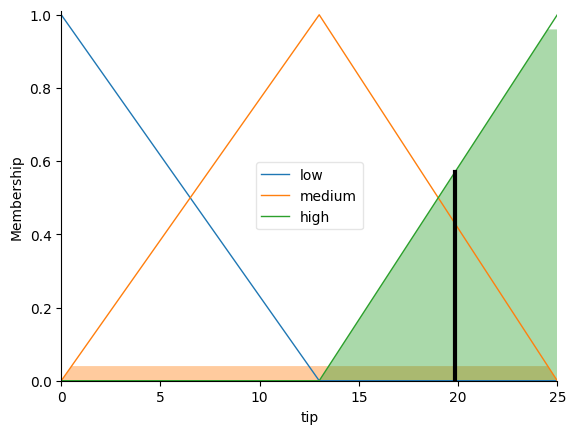

In [4]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Mendefinisikan variable input
quality = ctrl.Antecedent(np.arange(0, 11, 1), 'quality')
service = ctrl.Antecedent(np.arange(0, 11, 1), 'service')

# Mendefinisikan variable output
tip = ctrl.Consequent(np.arange(0, 26, 1), 'tip')

# Mendefinisikan fungsi keanggotaan untuk variable input dan output
quality['poor'] = fuzz.trimf(quality.universe, [0, 0, 5])
quality['average'] = fuzz.trimf(quality.universe, [0, 5, 10])
quality['good'] = fuzz.trimf(quality.universe, [5, 10, 10])

service['poor'] = fuzz.trimf(service.universe, [0, 0, 5])
service['average'] = fuzz.trimf(service.universe, [0, 5, 10])
service['good'] = fuzz.trimf(service.universe, [5, 10, 10])

tip['low'] = fuzz.trimf(tip.universe, [0, 0, 13])
tip['medium'] = fuzz.trimf(tip.universe, [0, 13, 25])
tip['high'] = fuzz.trimf(tip.universe, [13, 25, 25])

# Menampilkan fungsi keanggotaan
quality.view()
service.view()
tip.view()

# Membuat aturan fuzzy
rule1 = ctrl.Rule(quality['poor'] | service['poor'], tip['low'])
rule2 = ctrl.Rule(service['average'], tip['medium'])
rule3 = ctrl.Rule(service['good'] | quality['good'], tip['high'])

# Membuat sistem kontrol fuzzy
tipping_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
tipping = ctrl.ControlSystemSimulation(tipping_ctrl)

# Memberikan nilai input
tipping.input['quality'] = 6.5
tipping.input['service'] = 9.8

# Melakukan perhitungan
tipping.compute()

# Menampilkan hasil output
print("Nilai Tipping", tipping.output['tip'])

#Menampilkan kurva output
tip.view(sim=tipping)